# Lab 13 - Towards Self-Attention (*pl. Samoatencja*)


Dominik Gaweł

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dg7s/Machine-Learning/blob/main/hw/Finding_Odd_Shapes.ipynb)
-------------------------------

# **Last Homework – Finding Odd Shapes**

Due to the very sad events that took place on the Krakowskie Przedmieście Campus, the semester schedule has changed for the Monday and Thursday groups. To accommodate these changes, students in all groups receive a **combined homework assignment for both Class 13 and Class 14**.

## **RULES**

### **Deadline**

**The deadline for this homework is July 2nd, 23:59.**

### **Grading Criteria**

This homework will be graded on a scale from 0 to 4 points - plus a **bonus**.

- **4 points** (equivalent to completing two homework assignments worth 2 points each):
  - **the solution must attain an RMSE of 5.0 pixels or lower** (on 25,000 samples).
  - the sizes of all tensors must be annotated in comments
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **3 points** (equivalent to completing one homework assignment worth 2 points):
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - the sizes of all tensors must be annotated in comments
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **2 points** (equivalent to completing one homework assignment worth 2 points):
  - missing any one of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **1 point** (equivalent to submitting an incomplete homework assignment):
  - missing any two of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **0 points** (equivalent to not completing the homework assignment):
  - missing any three of the following:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **BONUS** – This homework encompasses all key elements from previous classes on deep neural networks.  
As a result, any student who obtains an **RMSE of 3.0 pixels or below** (on 25,000 samples), and whose solution would otherwise qualify for 4 points, **will receive the full 14 points** — equivalent to completing all homework assignments related to deep learning — regardless of their previous scores.



## **HOMEWORK ASSIGNMENT DESCRIPTION AND INSTRUCTIONS**

### **Online Dataset**

The code provided below generates an *online* dataset `OddXYDataset`.

The term *online* means that the dataset does not have a fixed set of pre-generated examples (like a traditional training set of fixed size). Instead, new samples are generated dynamically each time they are requested.

While the number of possible examples is finite in principle, it is so large that — for practical purposes — we can consider it to be effectively infinite.

In this setting, there is no need to use a separate validation or test set: the training error itself is a good estimate of the generalization error, since every training sample is new and unseen.

Consequently, the notion of an *epoch* becomes a matter of convention. For this assignment, we define one epoch as processing 25,000 training examples.

### **Training strategies**

Overfitting is not a problem in the *online* setting — but training can still stagnate in local minima or flat regions of the loss landscape.  
To address this, you will likely need to try one or more of the following strategies:

- **Multiple restarts** with different random seed values;
- **Adaptive learning rate** — consider researching training schedulers (this topic was not covered in class);
- **Progressive model growth** — start with a simpler architecture and gradually add components during training,
  so that the parts already present can learn what to do before the rest is introduced.

### **DataLoader**

The `show_examples()` function demonstrate how to wrap the dataset into a `torch.utils.data.DataLoader` so it becomes directly usable for the training/testing of a neural network.

### **Data Description**

By examining the provided code and a few sample images generated from this dataset, you will notice that:

1. **Each data sample** is a 64×64 black-and-white image with the following characteristics:
  - It contains several shapes of the same type (either circles, triangles, or squares), randomly placed and varying in size;
  - It includes one additional shape of a different type — the *odd* shape — also placed at a random location;
  
  **Note that these shapes may overlap partially or even completely, potentially hiding the odd shape.**

2. **The label** associated with each image is a 2D point indicating the coordinates of the center of the odd shape.

### **The Homework Objective**

Students should design an architecture of an **attention-based neural network** and train it so that it attains an RMSE (Root Mean Square Error, defined as the square root of the MSE) of **5.0 or lower**. Due to the nature of the online dataset, there is no need to test the solution on a separate test set.

Students should visualize the attention matrices in the trained network and **discuss what they observe** — not just describe them.  
Focus on interpreting the patterns: Where is the model attending? Are there any consistent behaviors across samples? Does attention correlate with the position of the odd shape? What do surprising or unclear patterns tell us?

A few technical requirements to observe:

- Seed all random number generators so that (1) your results are replicable and (2) I can rerun your solution and obtain the same output — *in case I need to check something*.

- Make sure your Colab file contains a **fully trained solution** with:
  - printed training output,
  - attention diagrams,
  - and a plot of the training loss curve.

This way, I don’t have to rerun your code unless absolutely necessary.

### **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.

## **SOLUTION SUGGESTIONS**

Students **do not need to follow these suggestions** — these are simply the strategies that worked for me.

The goal of the homework is, of course, to find the location of the odd shape. For that reason, it seems worthwhile to consider a *position-aware* variant of the post-processing of attention results. The solution I propose consists of the following components:


0. **Input**  
   Our input is a black-and-white image with 1 channel, of size 64×64 pixels.

1. **Embedding**  
  In class, we embedded a sequence of tokens in a multidimensional space, resulting in a sequence of embeddings. We also saw how such sequences are compatible with positional encoding and attention mechanisms used in subsequent stages.

  Here, we need to process an image that contains shapes of interest at various spatial locations.  
  To do this, I designed a Convolutional Neural Network with:
  - 1 input channel,
  - an input grid of 64x64 pixels,
  - and an output feature map arranged as a 12x12 grid with 16 channels.

  I used **no padding**, and each output neuron has a **receptive field of size 20x20** with a **stride of 4x4**.  
  This architectural choice yields **144 distinct positions** (12x12), each represented by a 16-dimensional feature vector.

  We can treat this as a sequence of 144 embeddings in 16-dimensional space — making it fully compatible with the attention mechanisms used later in the model.


2. **Positional Encoding**  
  I applied sinusoidal positional encoding, just like in class, using 16 positional dimensions to match the 16 feature dimensions of the image embeddings.  

  Positions were encoded based on their indices from 0 to 143.

3. **Attention**  
   I used full self-attention, where input tokens are linearly projected into Query, Key, and Value vectors using learned matrices.

4. **Post-Processing**  
   The classifier was implemented as a 2-layer MLP and applied **token-wise**, without averaging over positions.  

   This corresponds to the **position-aware** variant of post-processing the attention results, as discussed in class.

   As a result, the model produced a **logit for each of the 144 spatial locations**, which was then converted with `softmax` into a **probability distribution** over positions — representing the likelihood of the odd shape being located at each position.


5. **Final Prediction**  
   We know the exact position (center) of each of the 144 rectangular receptive fields of the embedding network. Since we also have the **probability** of each field being the target location (from the classifier), we can compute the **expected position** as a weighted average of receptive field centers. In what follows I will call it *soft argmax*.

   **Example:**

   Suppose we had only 4 output rectangles (instead of 144), with centers at:  
   $$(16, 16),\ (16, 48),\ (48, 16),\ \text{and } (48, 48).$$  
   and suppose the probabilities from the post-processing stage were:  
   $$(0.1,\ 0.2,\ 0.69999,\ 0.00001).$$  
   Then the predicted center would be:
   $$
   \begin{align*}
   x &= 16 \cdot 0.1 + 16 \cdot 0.2 + 48 \cdot 0.69999 + 48 \cdot 0.00001 \\
   y &= 16 \cdot 0.1 + 48 \cdot 0.2 + 16 \cdot 0.69999 + 48 \cdot 0.00001
   \end{align*}
   $$

   which yields an interpretable, differentiable prediction for the (x, y) location of the odd shape (*soft argmax*).

**The above steps bring the RMSE below 4.0 pixels.**  
However, the result depends on the network initialization — it is seed-dependent — so it's worth restarting the training a few times with different seeds to find a better-performing run.

To improve this result further, though, we'll have to work a bit harder. Here's how:


6. **Offset Regressor**

  The soft-argmax mechanism in step 5 identifies the **center** of the most probable receptive field, but it cannot fine-tune the prediction within that field. For example, if the odd shape is located in the **lower-left corner** of a receptive field, the best the model can do is predict the **center** of that rectangle — introducing a systematic error.

  *One may argue:* the design naturally accounts for a more nuanced case. When the odd shape lies **across the boundary between two receptive fields**, the attention distribution may spread across both regions. In such cases, the soft-argmax prediction becomes a **weighted average** of the centers of the adjacent fields. This behavior is a built-in **feature of the design** that allows the model to predict positions **off-center**, somewhere in between fields.

  *To that I would reply:* this is true — but it comes with a trade-off. When attention is distributed across multiple regions, it becomes **less clear which shapes are *regular* and which one is *odd***. This added ambiguity may make it harder for the network to reach a confident decision, especially in the early stages of training.

  To address this systematic limitation in a more structured way, I introduced an additional **2-layer MLP regressor**, applied **token-wise** to each of the 144 positions. This regressor takes the same attention output used by the classifier in step 4 and predicts a **local offset** $(\Delta x, \Delta y)$ within each receptive field. These offsets are then **aggregated** using the probabilities from step 4, resulting in a **soft average correction vector**.

  Note that the attention mechanism must learn to extract — from the original features — both:
  - the **probability** that the odd shape is located at a given position, and  
  - the **local coordinates** of that shape *within* the respective receptive field.


7. **Refined Prediction**

  The final predicted position is obtained by summing the **coarse prediction** from step 5 and the **fine-grained correction** from step 6. This allows the model to make accurate, differentiable predictions at **sub-receptive-field resolution**, resulting in significantly improved localization.

  **In summary:**

  - Step 5: predicts the expected center of the relevant receptive field (via soft-argmax);
  - Step 6: estimates a fine-grained, attention-weighted offset within that field;
  - Step 7: adds both components to produce the final prediction:

$$
\text{final prediction} = \underbrace{\sum_i p_i \cdot C_i}_{\text{soft argmax}} + \underbrace{\sum_i p_i \cdot (\Delta x, \Delta y)_i}_{\text{fine correction offset}}
$$


However, I was not able to train this network end-to-end from scratch — it seems that the two heads (the classifier inferring probabilities and the regressor inferring fine-grained corrections) were not able to learn their roles *simultaneously*.  

To solve this, I adopted a **progressive model growth** training strategy:

- First, I trained a one-headed version of the network (without steps 6 and 7) until the RMSE reached approximately 4.0 — a clear indication that the probability distribution was being inferred correctly.
- Then, I copied all weights into a new, complete two-headed network and continued training from that point.

**This strategy brought the RMSE down to 2.65 pixels.**


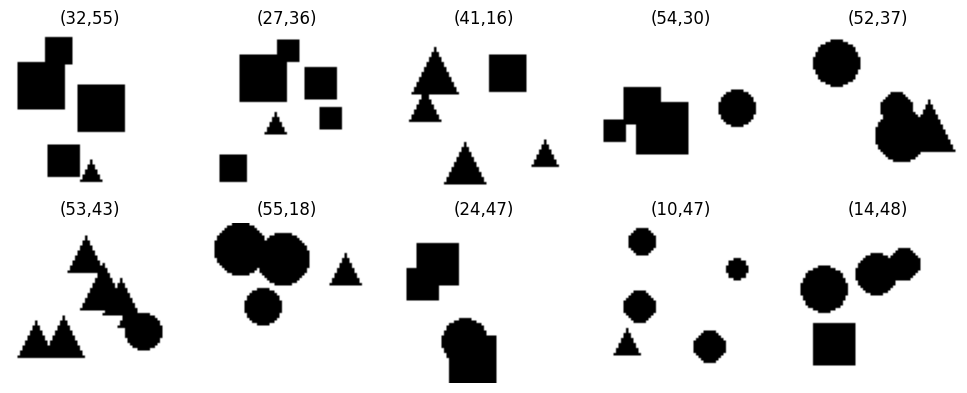

In [ ]:
# ============================================================
# 0. Imports & device
# ============================================================
import torch, random, math, numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ============================================================
# 1. Online dataset: 64×64, target = (cx,cy) ∈ [0,63]²  (float32)
# ============================================================
IMAGE = 64
SHAPES = ("circle", "square", "triangle")

def draw_shape(drawer, shape_type, center_x, center_y, radius):
    if shape_type == "circle":
        drawer.ellipse([center_x - radius, center_y - radius,
                        center_x + radius, center_y + radius], fill="black")
    elif shape_type == "square":
        drawer.rectangle([center_x - radius, center_y - radius,
                          center_x + radius, center_y + radius], fill="black")
    else:  # triangle
        drawer.polygon([
            (center_x, center_y - radius),
            (center_x - radius, center_y + radius),
            (center_x + radius, center_y + radius)
        ], fill="black")

class OddXYDataset(Dataset):
    """
    Generates images on-the-fly:
      * several random shapes of the same type
      * 1 additional shape of a different type
    Returns:
      * image (1×64×64 tensor, float32 normalized to [0,1])
      * label: float tensor [cx, cy] with center of the odd shape
    Arguments:
        num_samples             – total number of samples in the dataset
        same_shape_count_range – tuple (min, max), number of identical shapes
        shape_radius_range      – tuple (min_radius, max_radius) for shape size
    """
    def __init__(self,
                 num_samples,
                 same_shape_count_range=(3, 6),
                 shape_radius_range=(4, 10)):
        self.num_samples = num_samples
        self.same_shape_count_range = same_shape_count_range
        self.radius_min, self.radius_max = shape_radius_range

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        base_shape = random.choice(SHAPES)
        odd_shape = random.choice([s for s in SHAPES if s != base_shape])

        img = Image.new("L", (IMAGE, IMAGE), "white")
        drawer = ImageDraw.Draw(img)

        # draw identical shapes
        for _ in range(random.randint(*self.same_shape_count_range)):
            radius = random.randint(self.radius_min, self.radius_max)
            cx = random.randint(radius, IMAGE - radius - 1)
            cy = random.randint(radius, IMAGE - radius - 1)
            draw_shape(drawer, base_shape, cx, cy, radius)

        # draw the odd shape (with known center)
        radius = random.randint(self.radius_min, self.radius_max)
        cx = random.randint(radius, IMAGE - radius - 1)
        cy = random.randint(radius, IMAGE - radius - 1)
        draw_shape(drawer, odd_shape, cx, cy, radius)

        img_tensor = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.
        label_tensor = torch.tensor([float(cx), float(cy)], dtype=torch.float32)
        return img_tensor, label_tensor

def show_examples(num_examples=10):
    """
    Displays a grid of image samples from OddXYDataset using a DataLoader with batch_size=1.

    Args:
        num_examples (int): Number of examples to display.
    """
    dataset = OddXYDataset(num_samples=num_examples)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    num_columns = 5
    num_rows = math.ceil(num_examples / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))

    for i, (image, label) in enumerate(dataloader):
        if i >= num_examples:
            break
        image_np = image.squeeze(0).squeeze(0).numpy()  # B=1,C=1,H,W --> H,W
        cx, cy = label.squeeze(0)                       # B=1,2       --> 2
        axes.flat[i].imshow(image_np, cmap="gray")
        axes.flat[i].set_title(f"({cx:.0f},{cy:.0f})")
        axes.flat[i].axis("off")

    for j in range(i + 1, num_rows * num_columns):
        axes.flat[j].axis("off")

    plt.tight_layout()
    plt.show()

show_examples()

In [ ]:
class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, num_positions: int, dim: int):
        super().__init__()
        pos = torch.arange(num_positions).unsqueeze(1).float()
        i = torch.arange(dim).unsqueeze(0).float()
        angle = pos / (10000 ** ((2 * (i//2)) / dim))
        pe = torch.zeros(num_positions, dim)
        pe[:, 0::2] = torch.sin(angle[:, 0::2])
        pe[:, 1::2] = torch.cos(angle[:, 1::2])
        self.register_buffer('pe', pe)  # [num_positions, dim]

    def forward(self, x):
        # x: [B, num_positions, dim]
        # pe.unsqueeze(0): [1, num_positions, dim]
        return x + self.pe.unsqueeze(0)

class OddAttentionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Input: x [B, 1, 64, 64]
        # conv -> [B, 16, 12, 12] (kernel=20,stride=4)
        self.conv = nn.Conv2d(1, 16, kernel_size=20, stride=4, padding=0)
        self.bn_conv = nn.BatchNorm2d(16)              # [B, 16, 12, 12]
        # Positional encoding for 144 tokens, dim=16
        self.pos_enc = SinusoidalPositionalEncoding(num_positions=144, dim=16)
        self.ln1 = nn.LayerNorm(16)
        # Self-attention: input [B, 144, 16]
        self.attn = nn.MultiheadAttention(embed_dim=16, num_heads=4, batch_first=True)
        self.ln2 = nn.LayerNorm(16)
        # Token-wise MLP: [16 -> 32 -> 1]
        self.classifier = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1)                          # -> [B,144,1]
        )
        self.alpha = nn.Parameter(torch.tensor(1.0))
        # centra receptive fields: 12×12 grid with stride 4, shitf 9.5
        centers = [(c*4 + 9.5, r*4 + 9.5) for r in range(12) for c in range(12)]
        self.register_buffer('centers', torch.tensor(centers))  # [144,2]

    def forward(self, x):
        B = x.size(0)
        # conv -> [B,16,12,12]
        feat = self.conv(x)
        feat = self.bn_conv(feat)
        feat = F.relu(feat)                                  # [B,16,12,12]
        # flatten to sequence: -> [B,16,144] -> permute -> [B,144,16]
        feat = feat.view(B, 16, -1).permute(0, 2, 1)         # [B,144,16]
        # add positional encoding
        feat = self.pos_enc(feat)                            # [B,144,16]
        # self-attention
        attn_out, attn_weights = self.attn(feat, feat, feat) # attn_out: [B,144,16], weights: [B,144,144]
        # add residual connection
        feat = feat + self.alpha * attn_out                  # [B,144,16]
        # token-wise logits: -> [B,144,1] -> squeeze -> [B,144]
        logits = self.classifier(feat).squeeze(-1)           # [B,144]
        # probabilities per token
        probs = F.softmax(logits, dim=-1)                    # [B,144]
        # weighted sum of centers -> [B,2]
        px = (probs * self.centers[:,0].unsqueeze(0)).sum(dim=1)  # [B]
        py = (probs * self.centers[:,1].unsqueeze(0)).sum(dim=1)  # [B]
        preds = torch.stack([px, py], dim=1)                 # [B,2]

        return preds, attn_weights                            # preds: [B,2], attn_weights: [B,144,144]

In [ ]:
seed = 77

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
model = OddAttentionModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=10,
    verbose=True,
    min_lr=1e-6
)

criterion = nn.MSELoss()

train_ds = OddXYDataset(num_samples=25000)
train_loader = DataLoader(train_ds, batch_size=64)

Epoch 01: Train RMSE = 13.411


Epoch 02: Train RMSE = 12.780


Epoch 03: Train RMSE = 11.218


Epoch 04: Train RMSE = 10.187


Epoch 05: Train RMSE = 9.896


Epoch 06: Train RMSE = 9.583


Epoch 07: Train RMSE = 9.494


Epoch 08: Train RMSE = 9.428


Epoch 09: Train RMSE = 9.229


Epoch 10: Train RMSE = 9.167


Epoch 11: Train RMSE = 9.110


Epoch 12: Train RMSE = 8.773


Epoch 13: Train RMSE = 8.522


Epoch 14: Train RMSE = 8.130


Epoch 15: Train RMSE = 7.867


Epoch 16: Train RMSE = 7.644


Epoch 17: Train RMSE = 7.459


Epoch 18: Train RMSE = 7.358


Epoch 19: Train RMSE = 7.268


Epoch 20: Train RMSE = 7.114


Epoch 21: Train RMSE = 7.026


Epoch 22: Train RMSE = 6.942


Epoch 23: Train RMSE = 6.801


Epoch 24: Train RMSE = 6.714


Epoch 25: Train RMSE = 6.657


Epoch 26: Train RMSE = 6.678


Epoch 27: Train RMSE = 6.646


Epoch 28: Train RMSE = 6.374


Epoch 29: Train RMSE = 6.559


Epoch 30: Train RMSE = 6.381


Epoch 31: Train RMSE = 6.307


Epoch 32: Train RMSE = 6.281


Epoch 33: Train RMSE = 6.344


Epoch 34: Train RMSE = 6.078


Epoch 35: Train RMSE = 6.239


Epoch 36: Train RMSE = 6.067


Epoch 37: Train RMSE = 6.007


Epoch 38: Train RMSE = 6.205


Epoch 39: Train RMSE = 6.008


Epoch 40: Train RMSE = 6.030


Epoch 41: Train RMSE = 6.017


Epoch 42: Train RMSE = 6.015


Epoch 43: Train RMSE = 5.727


Epoch 44: Train RMSE = 5.818


Epoch 45: Train RMSE = 5.903


Epoch 46: Train RMSE = 5.860


Epoch 47: Train RMSE = 5.882


Epoch 48: Train RMSE = 5.713


Epoch 49: Train RMSE = 5.728


Epoch 50: Train RMSE = 5.841


Epoch 51: Train RMSE = 5.778


Epoch 52: Train RMSE = 5.748


Epoch 53: Train RMSE = 5.671


Epoch 54: Train RMSE = 5.693


Epoch 55: Train RMSE = 5.666


Epoch 56: Train RMSE = 5.528


Epoch 57: Train RMSE = 5.518


Epoch 58: Train RMSE = 5.636


Epoch 59: Train RMSE = 5.472


Epoch 60: Train RMSE = 5.417


Epoch 61: Train RMSE = 5.618


Epoch 62: Train RMSE = 5.483


Epoch 63: Train RMSE = 5.578


Epoch 64: Train RMSE = 5.498


Epoch 65: Train RMSE = 5.575


Epoch 66: Train RMSE = 5.490


Epoch 67: Train RMSE = 5.518


Epoch 68: Train RMSE = 5.470


Epoch 69: Train RMSE = 5.607


Epoch 70: Train RMSE = 5.489


Epoch 71: Train RMSE = 5.584


Epoch 72: Train RMSE = 5.269


Epoch 73: Train RMSE = 5.068


Epoch 74: Train RMSE = 5.187


Epoch 75: Train RMSE = 5.192


Epoch 76: Train RMSE = 5.176


Epoch 77: Train RMSE = 5.219


Epoch 78: Train RMSE = 5.122


Epoch 79: Train RMSE = 5.184


Epoch 80: Train RMSE = 5.207


Epoch 81: Train RMSE = 5.116


Epoch 82: Train RMSE = 5.125


Epoch 83: Train RMSE = 5.116


Epoch 84: Train RMSE = 5.075


Epoch 85: Train RMSE = 5.093


Epoch 86: Train RMSE = 5.024


Epoch 87: Train RMSE = 5.062


Epoch 88: Train RMSE = 5.082


Epoch 89: Train RMSE = 5.010


Epoch 90: Train RMSE = 5.070


Epoch 91: Train RMSE = 5.017


Epoch 92: Train RMSE = 4.964


Epoch 93: Train RMSE = 4.991


Epoch 94: Train RMSE = 4.996


Epoch 95: Train RMSE = 4.911


Epoch 96: Train RMSE = 5.022


Epoch 97: Train RMSE = 4.938


Epoch 98: Train RMSE = 5.075


Epoch 99: Train RMSE = 5.083


Epoch 100: Train RMSE = 5.054


Epoch 101: Train RMSE = 4.920


Epoch 102: Train RMSE = 4.933


Epoch 103: Train RMSE = 4.931


Epoch 104: Train RMSE = 5.040


Epoch 105: Train RMSE = 4.862


Epoch 106: Train RMSE = 5.031


Epoch 107: Train RMSE = 5.009


Epoch 108: Train RMSE = 5.010


Epoch 109: Train RMSE = 5.036


Epoch 110: Train RMSE = 5.046


Epoch 111: Train RMSE = 4.994


Epoch 112: Train RMSE = 5.013


Epoch 113: Train RMSE = 4.927


Epoch 114: Train RMSE = 4.831


Epoch 115: Train RMSE = 4.902


Epoch 116: Train RMSE = 5.008


Epoch 117: Train RMSE = 4.922


Epoch 118: Train RMSE = 4.938


Epoch 119: Train RMSE = 4.878


Epoch 120: Train RMSE = 4.972


Epoch 121: Train RMSE = 4.913


Epoch 122: Train RMSE = 5.003


Epoch 123: Train RMSE = 4.974


Epoch 124: Train RMSE = 4.923


Epoch 125: Train RMSE = 4.961


Epoch 126: Train RMSE = 4.844


Epoch 127: Train RMSE = 4.779


Epoch 128: Train RMSE = 4.918


Epoch 129: Train RMSE = 4.797


Epoch 130: Train RMSE = 4.823


Epoch 131: Train RMSE = 4.824


Epoch 132: Train RMSE = 4.881


Epoch 133: Train RMSE = 4.680


Epoch 134: Train RMSE = 4.916


Epoch 135: Train RMSE = 4.854


Epoch 136: Train RMSE = 4.870


Epoch 137: Train RMSE = 4.856


Epoch 138: Train RMSE = 4.793


Epoch 139: Train RMSE = 4.840


Epoch 140: Train RMSE = 4.781


Epoch 141: Train RMSE = 4.952


Epoch 142: Train RMSE = 4.858


Epoch 143: Train RMSE = 4.779


Epoch 144: Train RMSE = 4.776


Epoch 145: Train RMSE = 4.778


Epoch 146: Train RMSE = 4.856


Epoch 147: Train RMSE = 4.752


Epoch 148: Train RMSE = 4.718


Epoch 149: Train RMSE = 4.778


Epoch 150: Train RMSE = 4.781


Epoch 151: Train RMSE = 4.671


Epoch 152: Train RMSE = 4.785


Epoch 153: Train RMSE = 4.727


Epoch 154: Train RMSE = 4.759


Epoch 155: Train RMSE = 4.783


Epoch 156: Train RMSE = 4.706


Epoch 157: Train RMSE = 4.771


Epoch 158: Train RMSE = 4.683


Epoch 159: Train RMSE = 4.734


Epoch 160: Train RMSE = 4.777


Epoch 161: Train RMSE = 4.666


Epoch 162: Train RMSE = 4.786


Epoch 163: Train RMSE = 4.737


Epoch 164: Train RMSE = 4.753


Epoch 165: Train RMSE = 4.737


Epoch 166: Train RMSE = 4.708


Epoch 167: Train RMSE = 4.758


Epoch 168: Train RMSE = 4.887


Epoch 169: Train RMSE = 4.815


Epoch 170: Train RMSE = 4.793


Epoch 171: Train RMSE = 4.757


Epoch 172: Train RMSE = 4.771


Epoch 173: Train RMSE = 4.735


Epoch 174: Train RMSE = 4.670


Epoch 175: Train RMSE = 4.724


Epoch 176: Train RMSE = 4.756


Epoch 177: Train RMSE = 4.784


Epoch 178: Train RMSE = 4.872


Epoch 179: Train RMSE = 4.753


Epoch 180: Train RMSE = 4.768


Epoch 181: Train RMSE = 4.712


Epoch 182: Train RMSE = 4.691


Epoch 183: Train RMSE = 4.734


Epoch 184: Train RMSE = 4.724


Epoch 185: Train RMSE = 4.724


Epoch 186: Train RMSE = 4.676


Epoch 187: Train RMSE = 4.668


Epoch 188: Train RMSE = 4.828


Epoch 189: Train RMSE = 4.709


Epoch 190: Train RMSE = 4.695


Epoch 191: Train RMSE = 4.720


Epoch 192: Train RMSE = 4.723


Epoch 193: Train RMSE = 4.820


Epoch 194: Train RMSE = 4.720


Epoch 195: Train RMSE = 4.830


Epoch 196: Train RMSE = 4.715


Epoch 197: Train RMSE = 4.740


Epoch 198: Train RMSE = 4.615


Epoch 199: Train RMSE = 4.724


Epoch 200: Train RMSE = 4.652


Epoch 201: Train RMSE = 4.858


Epoch 202: Train RMSE = 4.673


Epoch 203: Train RMSE = 4.631


Epoch 204: Train RMSE = 4.751


Epoch 205: Train RMSE = 4.708


Epoch 206: Train RMSE = 4.748


Epoch 207: Train RMSE = 4.726


Epoch 208: Train RMSE = 4.726


Epoch 209: Train RMSE = 4.806


Epoch 210: Train RMSE = 4.725


Epoch 211: Train RMSE = 4.729


Epoch 212: Train RMSE = 4.772


Epoch 213: Train RMSE = 4.661


Epoch 214: Train RMSE = 4.732


Epoch 215: Train RMSE = 4.709


Epoch 216: Train RMSE = 4.812


Epoch 217: Train RMSE = 4.727


Epoch 218: Train RMSE = 4.798


Epoch 219: Train RMSE = 4.628


Epoch 220: Train RMSE = 4.660


Epoch 221: Train RMSE = 4.738


Epoch 222: Train RMSE = 4.704


Epoch 223: Train RMSE = 4.719


Epoch 224: Train RMSE = 4.729


Epoch 225: Train RMSE = 4.793


Epoch 226: Train RMSE = 4.745


Epoch 227: Train RMSE = 4.794


Epoch 228: Train RMSE = 4.744


Epoch 229: Train RMSE = 4.709


Epoch 230: Train RMSE = 4.828


Epoch 231: Train RMSE = 4.614


Epoch 232: Train RMSE = 4.718


Epoch 233: Train RMSE = 4.722


Epoch 234: Train RMSE = 4.717


Epoch 235: Train RMSE = 4.839


Epoch 236: Train RMSE = 4.686


Epoch 237: Train RMSE = 4.768


Epoch 238: Train RMSE = 4.816


Epoch 239: Train RMSE = 4.733


Epoch 240: Train RMSE = 4.692


Epoch 241: Train RMSE = 4.749


Epoch 242: Train RMSE = 4.725


Epoch 243: Train RMSE = 4.648


Epoch 244: Train RMSE = 4.762


Epoch 245: Train RMSE = 4.765


Epoch 246: Train RMSE = 4.662


Epoch 247: Train RMSE = 4.612


Epoch 248: Train RMSE = 4.777


Epoch 249: Train RMSE = 4.767


Epoch 250: Train RMSE = 4.731


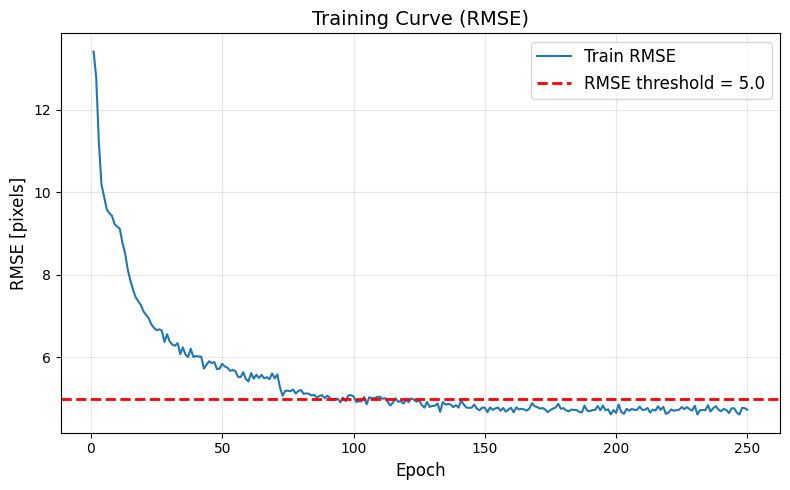

In [ ]:
rmse_list = []

max_epochs = 250

for epoch in range(1, max_epochs + 1):
    model.train()
    total_loss = 0.0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{max_epochs}", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        preds, _ = model(imgs)
        loss = criterion(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * imgs.size(0)

    train_mse = total_loss / len(train_ds)
    train_rmse = train_mse ** 0.5
    scheduler.step(train_mse)
    rmse_list.append(train_rmse)
    tqdm.write(f"Epoch {epoch:02d}: Train RMSE = {train_rmse:.3f}")

epochs = list(range(1, len(rmse_list) + 1))
plt.figure(figsize=(8,5))
plt.plot(epochs, rmse_list, label='Train RMSE')
plt.axhline(5.0, color='red', linestyle='--', linewidth=2, label='RMSE threshold = 5.0')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('RMSE [pixels]', fontsize=12)
plt.title('Training Curve (RMSE)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

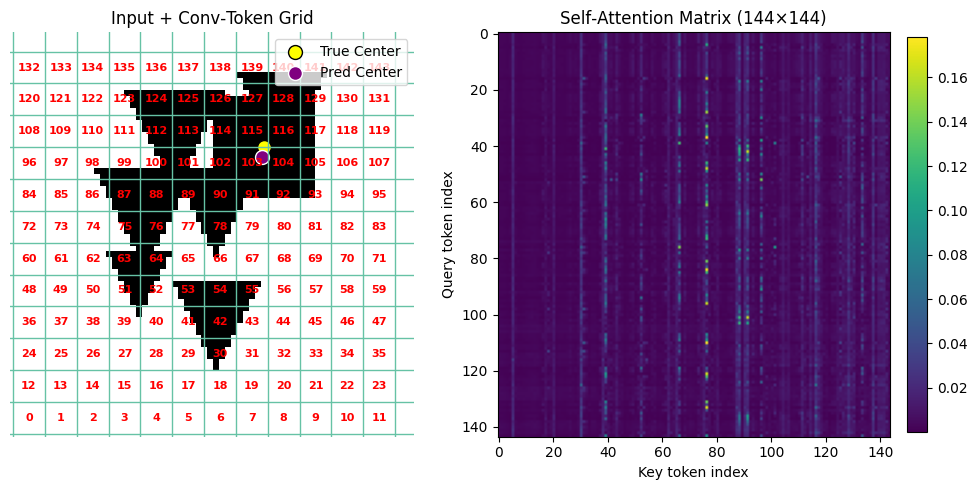

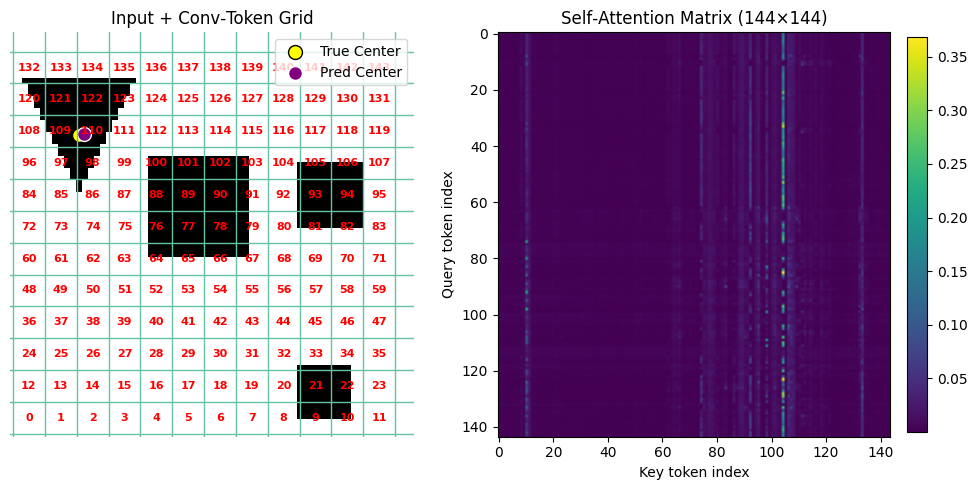

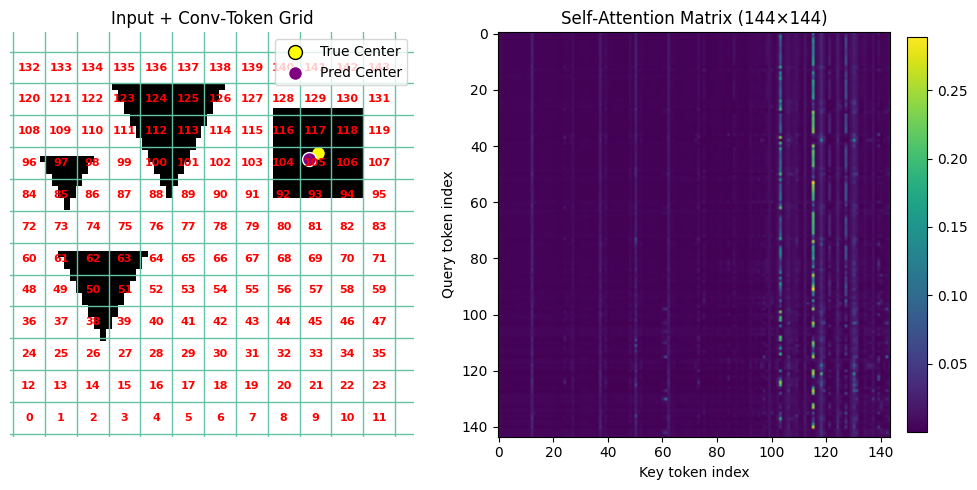

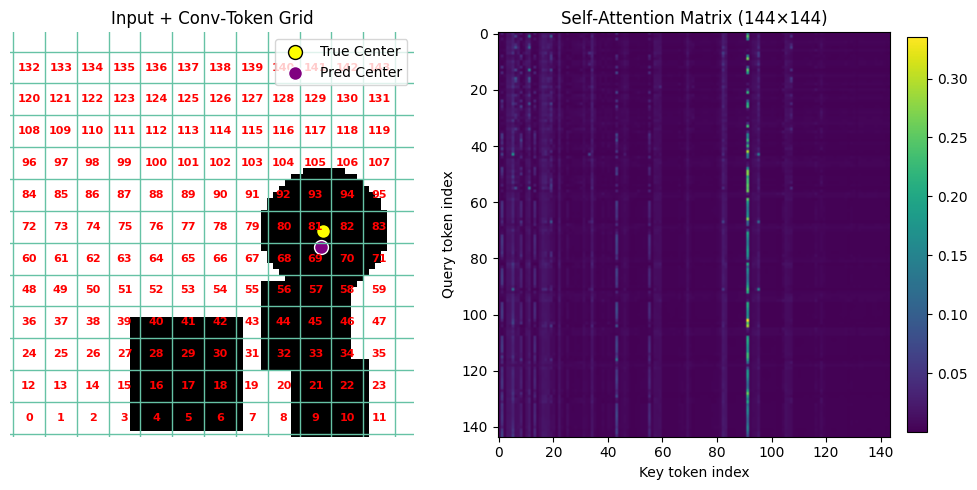

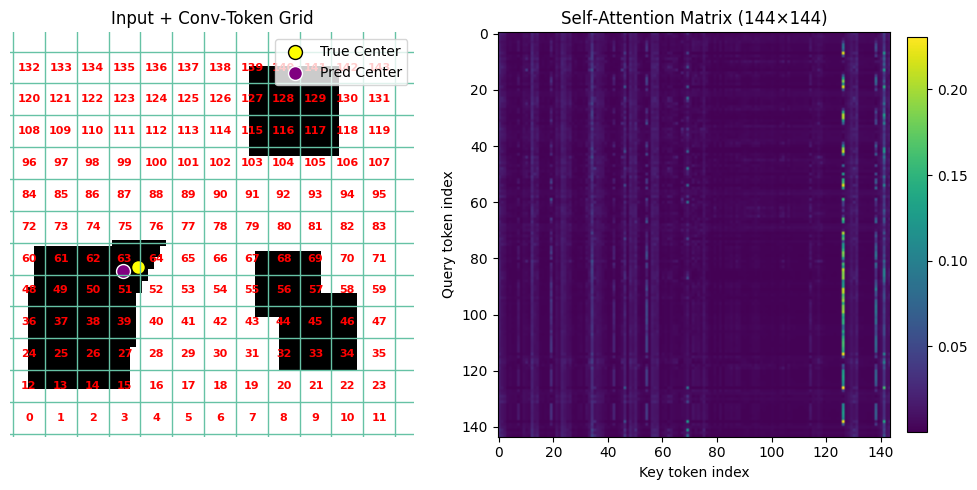

In [ ]:
def plot_image_and_attention(img, attn_weights, true_center, pred_center, grid_size=12):

    img_np = img.squeeze().cpu().numpy()
    tx, ty = true_center
    px, py = pred_center

    fig, (ax_img, ax_attn) = plt.subplots(1, 2, figsize=(10,5))

    # ‣ LEFT: image + grid + indices + centers
    ax_img.imshow(img_np, cmap='gray', origin='lower')
    step = 64 / grid_size

    for i in range(grid_size+1):
        ax_img.axhline(i*step, color='#66c2a5', linewidth=1)
        ax_img.axvline(i*step, color='#66c2a5', linewidth=1)

    idx = 0
    for r in range(grid_size):
        for c in range(grid_size):
            cx = (c + 0.5) * step
            cy = (r + 0.5) * step
            ax_img.text(cx, cy, str(idx),
                        color='red', ha='center', va='center',
                        fontsize=8, fontweight='bold')
            idx += 1

    # plot true vs. predicted centers
    ax_img.scatter([tx], [ty], c='yellow', edgecolors='black', s=100, label='True Center')
    ax_img.scatter([px], [py], c='purple', edgecolors='white', s=100, label='Pred Center')
    ax_img.legend(loc='upper right')
    ax_img.set_title("Input + Conv‑Token Grid")
    ax_img.axis('off')

    # ‣ RIGHT: attention matrix heatmap
    im = ax_attn.imshow(attn_weights, cmap='viridis', aspect='auto')
    ax_attn.set_title("Self‑Attention Matrix (144×144)")
    ax_attn.set_xlabel("Key token index")
    ax_attn.set_ylabel("Query token index")
    plt.colorbar(im, ax=ax_attn, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()


model.eval()
for i in range(5):
    img, label = train_ds[i]
    img_t = img.unsqueeze(0).to(device)
    with torch.no_grad():
        preds, attn_weights = model(img_t)
    aw = attn_weights[0].cpu().numpy()
    pred_center = preds[0].cpu().numpy()
    plot_image_and_attention(img, aw, label.numpy(), pred_center)

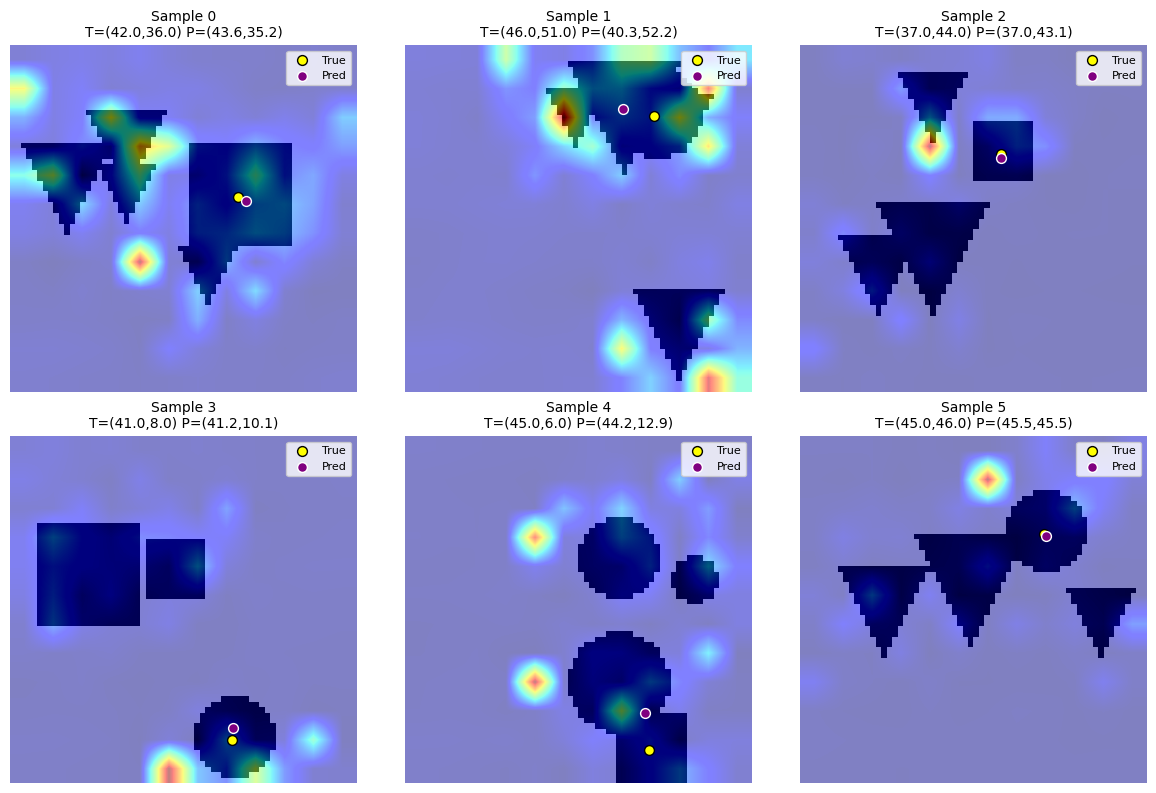

In [ ]:
def plot_condensed_attention_grid(dataset, model, device, n_rows=2, n_cols=3, grid_size=12):

    model.eval()
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
    axes = axes.flatten()

    for idx, ax in enumerate(axes):
        img, label = dataset[idx]
        img_t = img.unsqueeze(0).to(device)
        with torch.no_grad():
            preds, attn_weights = model(img_t)

        # Condensed attention
        mean_attn = attn_weights[0].mean(dim=0).cpu().numpy()
        heatmap = mean_attn.reshape(grid_size, grid_size)

        # True / pred coords
        tx, ty = label[0].item(), label[1].item()
        px, py = preds[0,0].item(), preds[0,1].item()

        ax.imshow(img.squeeze().cpu().numpy(), cmap='gray', extent=[0,64,0,64], origin='lower')
        # Overlay attention heatmap
        ax.imshow(
            heatmap,
            cmap='jet',
            alpha=0.5,
            extent=[0,64,0,64],
            origin='lower',
            interpolation='bilinear'
        )
        # Scatter true & pred
        ax.scatter([tx], [ty], c='yellow', edgecolors='black', s=50, label='True')
        ax.scatter([px], [py], c='purple', edgecolors='white', s=50, label='Pred')
        ax.set_title(f"Sample {idx}\nT=({tx:.1f},{ty:.1f}) P=({px:.1f},{py:.1f})", fontsize=10)
        ax.axis('off')
        ax.legend(loc='upper right', fontsize=8)

    plt.tight_layout()
    plt.show()

plot_condensed_attention_grid(train_ds, model, device, n_rows=2, n_cols=3)

# Conclusions and Observations

## 1. Architectural and Training Improvements

- **Batch Normalization**  
  Introducing `BatchNorm2d` immediately after the convolutional layer stabilized the feature distributions and reduced internal covariate shift. As a result, the network converged more smoothly and reached lower training RMSE values much faster.

- **Learning Rate Scheduler**  
  Using a `ReduceLROnPlateau` scheduler allowed the optimizer to automatically decrease the learning rate whenever the training MSE plateaued. This helped us break through the 5‑pixel RMSE barrier more quickly, avoiding long flat regions in the loss curve.

- **Residual Connection in Self‑Attention**  
  Adding the skip connection  
  $$
    \mathrm{feat} = \mathrm{feat} + \alpha\cdot\,\mathrm{SelfAttention}(\mathrm{feat})
  $$
  preserved the raw convolutional features alongside the attended features. This produced much cleaner, more focused attention maps that are easier to interpret.

- **Soft‑Argmax with Exact Receptive‑Field Centers**  
  After computing a probability distribution over the 144 tokens via token‑wise classification and softmax, we convert these probabilities into continuous $(x,y)$ coordinates by taking a weighted average of the true convolutional receptive‑field centers:
  $$
    x_j = c_j \times 4 + 9.5,\quad y_j = r_j \times 4 + 9.5,
  $$
  where $j = 12\,r_j + c_j$. This ensures that our final predictions align exactly with the 20×20 patches (stride 4) used by the CNN.

---

## 2. Attention Visualization: From 144 Tokens Back to Image Space

### A. Overlaying the 144×144 Attention Matrix

Each figure consists of two subplots:

- **Left:** the original input image is overlaid with a conceptual 12×12 grid of **144 logical blocks**, each labeled in red from 0 to 143. These indices are provided only to give a rough idea of which part of the image corresponds to which token.
- **Right:** the full self‑attention weight matrix  
  $$
    A \in \mathbb{R}^{144\times 144},
  $$  
  where $A_{i,j}$ is the normalized attention score from query token $i$ to key token $j$.

> **Note:** These logical blocks are just a visualization aid and do **not** match the CNN’s actual 20×20 receptive fields (which overlap with stride 4). In reality, each token represents a 20×20 patch sliding over the image (with centers 4 pixels apart), so the true patch centers and the grid shown here will not align perfectly. The red numbers simply serve as conceptual guides to map portions of the attention matrix back onto the image.  

---

### B. Condensed 12×12 Heatmap Overlay

To make attention interpretable, we reduce the full 144×144 attention matrix to a compact 12×12 grid. For each key token $j$, we compute:

$$
m_j = \frac{1}{144} \sum_{i=1}^{144} A_{i,j},
$$

which yields a single importance score per token. We then reshape $\{m_j\}_{j=1}^{144}$ into a 12×12 grid, matching the spatial layout of the convolutional feature map.

Finally, we overlay this 12×12 heatmap onto the 64×64 input image using bilinear interpolation. Warm colors indicate regions with higher average attention.

---


## 3. Insights from Attention Visualizations

- **Sharp “pin-like” patterns in the full 144×144 matrix**  
  In the full attention subplot, you can see thin vertical stripes, evidence that the self‑attention mechanism focuses on specific neighborhoods of tokens. Since there are typically several shapes in each image, attention is distributed across them rather than perfectly uniform. When shapes heavily overlap, those stripes blur into a more even pattern, suggesting that many convolutional pixels carry information relevant to that region.  

  A vertical stripe means that many query tokens assign non-negligible weight to the same key token, implying semi-global importance. While the stripe isn't perfectly uniform, its consistent presence indicates that most queries find the token relevant to some extent.

  This effect likely arises from the CNN’s large kernel $20×20$ and small stride $4$, which cause overlapping receptive fields. As a result, strong features (like an odd shape) are visible across multiple patches, making the associated token important for many queries, even if not equally so.


- **Localized focus around actual shapes (12×12 heatmap)**  
  In the condensed 12×12 overlay, attention often locks onto small, highly informative regions that help distinguish the odd object. This happens when the figures are well-separated and visually distinct (e.g., Sample 2 and 3), allowing the model to isolate key features.

  In contrast, when shapes heavily overlap or form ambiguous forms (e.g., Sample 0 and 1), attention becomes more diffuse, covering multiple regions. This broader spread reflects the model’s uncertainty and the need to gather context from a larger area. It’s further amplified by the CNN’s large 20×20 kernel, which blends information across neighboring patches, especially in crowded scenes.